# Project 4: Avocado Price Models and Predictions

### Step 1: Define the Problem

Avocados taste so good, but they're just so pricey! What is someone to do? Ignore their diminishing investment contributions at the expense of their morning avocado toast? Kick their haas habit? Or would it be wisest to uproot their lives and move to the city in the country with the cheapest avocado prices? Using 3 years of historical avocado sales data provided generously by the Haas Avocado Board, we'll set out to predict avocado prices across the country. This way, we'll determine which city (or cities) will be the best to move to for the guacamole that'll hurt our wallet the least.

### Step 2: Gather the data

###### 2.01 : Make necessary imports

In [2]:
# Import pandas and numpy

import pandas as pd
import numpy as np

In [3]:
# Read in avocado csv as a dataframe, assign it to a variable

avocados = pd.read_csv('avocado.csv')

### Step 3: Explore the data

###### 3.01: Make necessary imports

In [4]:
# Import seaborn and matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

###### 3.02 Check shape of dataframe

In [5]:
# Check out the shape of the dataframe
avocados.shape

# 14 columns and 18,429 data entries

(18249, 14)

###### 3.03 Check out first few rows

In [6]:
# Check out the first few rows
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


###### 3.04 Check the column names

In [7]:
# What are the 14 columns that we have?
avocados.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

###### 3.05 Create a data dictionary

|Column name|Description|
|---|---|
|**Unnamed 0**|Simply a reference column that can be dropped|
|**Date**|Date of the observed transaction|
|**AveragePrice**|The average price of a single avocado in the noted transaction|
|**Total Volume**|Total Number of avocados sold|
|**4046**|Total number of avocados with PLU 4046 sold|
|**4225**|Total number of avocados with PLU 4225 sold|
|**4770**|Total number of avocados with PLU 4770 sold|
|**Total Bags**|Total number of bags sold (a sum of columns Small Bags, Large Bags, and XLarge Bags)|
|**Small Bags**|Number of small bags sold|
|**Large Bags**|Number of large bags sold|
|**XLarge Bags**|Number of extra large bags sold|
|**type**|One of two values, either 'conventional' or 'organic'|
|**year**|Year of the recorded transaction|
|**region**|The city or region of the observation|

A few additonal notes on this dataframe:

1. This dataset represents 3 years of retail scan data for National retail volume (units) and price from 2015 - 2018.
2. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
3. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. 
4. The Average Price (of avocados) in the dataset reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
5. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

###### 3.06 Check for null values

In [8]:
# No nulls! Joy!
avocados.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

###### 3.07 What type of data is in each column?


In [9]:
avocados.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

###### 3.08 Fix column headings

In [10]:
# Lowercase the column names
avocados.columns = avocados.columns.str.lower()

In [11]:
# Remove spaces from 4 columns: Total Volume, Small Bags, Large Bags, XLarge Bags
avocados.rename(columns = {'total volume' : 'total_volume' , 'small bags' : 'small_bags',
                           'large bags' : 'large_bags', 'xlarge bags': 'xlarge_bags',
                           'total bags' : 'total_bags', 'averageprice' : 'average_price'}, 
                            inplace = True)

###### 3.09 Explore each column individually. What's the mean? Standard deviation? How do values range? Show a boxplot, bar chart, or histogram where appropriate

In [12]:
# Display column names

avocados.columns

Index(['unnamed: 0', 'date', 'average_price', 'total_volume', '4046', '4225',
       '4770', 'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type',
       'year', 'region'],
      dtype='object')

**Do a quick pairplot**

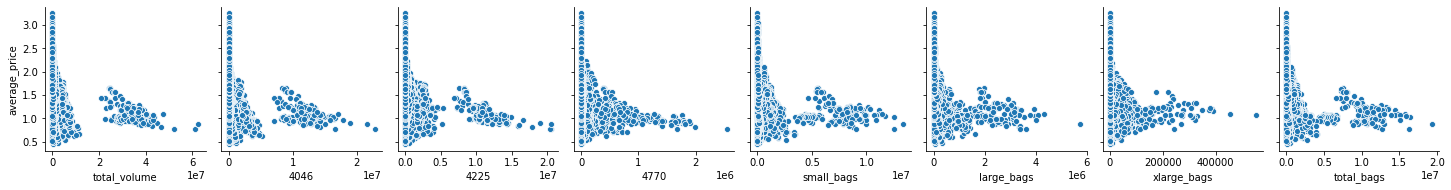

In [38]:
# Visualize what linear relationships might exist with numeric data

sns.pairplot(avocados, x_vars = ['total_volume', '4046', '4225', '4770', 'small_bags',
                                 'large_bags', 'xlarge_bags', 'total_bags'], 
                                 y_vars=['average_price']);

Linearity is nowhere to be found here.

**Unnamed: 0**

In [13]:
# Drop Unnamed 0 column
avocados.drop(columns=['unnamed: 0'], inplace=True)

**Date**

In [14]:
# Date column
avocados['date'].describe()

# There are 18,249 entries, only 169 of which are unique values

count          18249
unique           169
top       2015-01-18
freq             108
Name: date, dtype: object

**Average Price**

In [15]:
# Average price figures
avocados['average_price'].describe()

# On average, a single avocado costs $1.40
# The standard deviation of avocado prices
# The minimum observed per avocado price is $0.44
# The maximum avocado price recorded is $3.25

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: average_price, dtype: float64

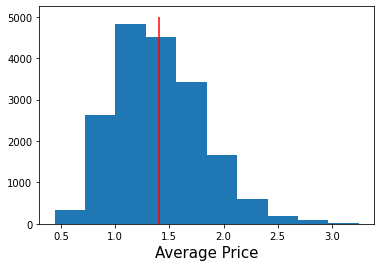

In [16]:
# Show the distribution of average prices using a histogram
plt.hist(avocados['average_price'])
plt.xlabel('Average Price', fontsize = 15);
plt.vlines(x = np.mean(avocados['average_price']),
                 ymin = 0,
                 ymax = 5000,
                 color = 'red');


**Total Volume**

In [17]:
# Total volume
avocados['total_volume'].describe()

# Average total volume is 850,644 avocados
# Standard deviation of 3.45 million
# Minimum volume is 84
# Maximum volume is 62.5 million

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: total_volume, dtype: float64

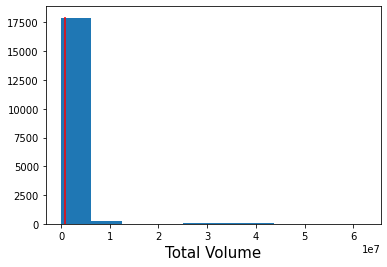

In [18]:
# Show the distribution of total volume using a histogram
plt.hist(avocados['total_volume'])
plt.xlabel('Total Volume', fontsize = 15)
plt.vlines(x = np.mean(avocados['total_volume']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**What are the regions/cities that account for these extreme outliers?**

In [19]:
avocados[avocados['total_volume'] > 3_000_000]['region'].unique()

array(['California', 'GreatLakes', 'LosAngeles', 'Midsouth', 'Northeast',
       'SouthCentral', 'Southeast', 'TotalUS', 'West', 'Plains'],
      dtype=object)

**Product Code 4046**

In [20]:
# Product code 4046
avocados['4046'].describe()

# Mean number of 4046 avocados sold is 293,000
# Standard deviation is 1.26 million avocados
# Minimum is 0
# Maximum is 22.74 million

count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64

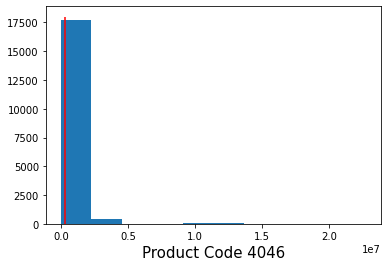

In [21]:
# Show the distribution of 4046 sales using a histogram
plt.hist(avocados['4046'])
plt.xlabel('Product Code 4046', fontsize = 15)
plt.vlines(x = np.mean(avocados['4046']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Product Code 4225**

In [22]:
# Product code 4225
avocados['4225'].describe()

# Mean number of 4225 avocados sold is 295,000
# Standard deviation is 1.20 million
# Minimum is 0
# Maximum is 20.47 million

count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64

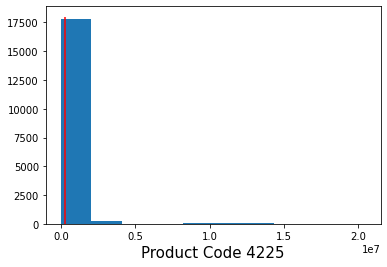

In [23]:
# Show the distribution of 4225 sales using a histogram
plt.hist(avocados['4225'])
plt.xlabel('Product Code 4225', fontsize = 15)
plt.vlines(x = np.mean(avocados['4225']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Product Code 4770**

In [24]:
# Product code 4770
avocados['4770'].describe()

# Mean number of 4770 avocados sold is 22,839
# Standard Deviation is 107,464 avocados
# Minimum is 0
# Maximum is 2.55 million

count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64

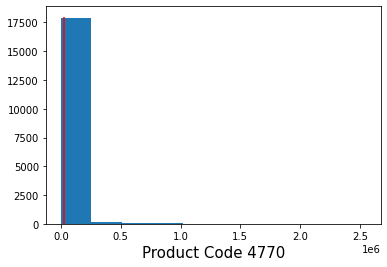

In [25]:
# Show the distribution of 4770 sales using a histogram
plt.hist(avocados['4770'])
plt.xlabel('Product Code 4770', fontsize = 15)
plt.vlines(x = np.mean(avocados['4770']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Total Bags**

In [26]:
# Total Bags Sales
avocados['total_bags'].describe()

# Mean number of bags is 239,639
# Standard deviation is 986,242
# Mimnimum bags sold is 0
# Maximum bags sold is 19.37 million

count    1.824900e+04
mean     2.396392e+05
std      9.862424e+05
min      0.000000e+00
25%      5.088640e+03
50%      3.974383e+04
75%      1.107834e+05
max      1.937313e+07
Name: total_bags, dtype: float64

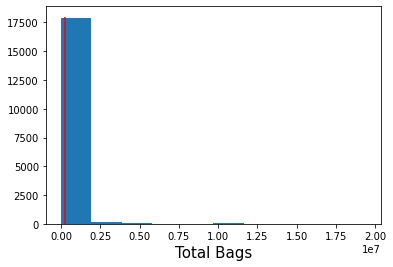

In [27]:
# Show the distribution of total bags sold using a histogram
plt.hist(avocados['total_bags'])
plt.xlabel('Total Bags', fontsize = 15)
plt.vlines(x = np.mean(avocados['total_bags']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Small bags**

In [28]:
# Small Bag sales
avocados['small_bags'].describe()

# Mean: 182,194 bags
# Standard Deviation: 746,179
# Min: 0
# Max: 13.38 million

count    1.824900e+04
mean     1.821947e+05
std      7.461785e+05
min      0.000000e+00
25%      2.849420e+03
50%      2.636282e+04
75%      8.333767e+04
max      1.338459e+07
Name: small_bags, dtype: float64

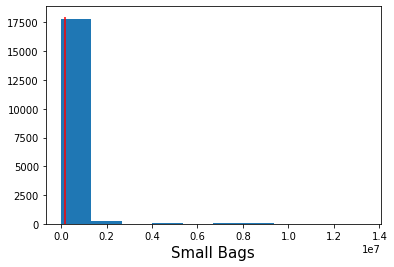

In [29]:
# Show the distribution of small bags sold using a histogram
plt.hist(avocados['small_bags'])
plt.xlabel('Small Bags', fontsize = 15)
plt.vlines(x = np.mean(avocados['small_bags']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Large Bags**

In [30]:
# Describe features of Large Bags
avocados['large_bags'].describe()

# Mean: 54,338
# Standard Deviation: 243,966
# Min: 0
# Max: 5.72 million

count    1.824900e+04
mean     5.433809e+04
std      2.439660e+05
min      0.000000e+00
25%      1.274700e+02
50%      2.647710e+03
75%      2.202925e+04
max      5.719097e+06
Name: large_bags, dtype: float64

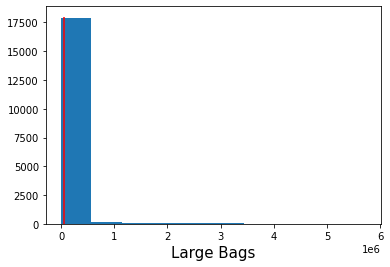

In [31]:
# Show the distribution of large bags sold using a histogram
plt.hist(avocados['large_bags'])
plt.xlabel('Large Bags', fontsize = 15)
plt.vlines(x = np.mean(avocados['large_bags']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Extra Large Bags**

In [32]:
# Describe features of Extra Large Bags
avocados['xlarge_bags'].describe()

# Mean: 3,106
# Standard Deviation: 17,692
# Min: 0
# Max: 551,693

count     18249.000000
mean       3106.426507
std       17692.894652
min           0.000000
25%           0.000000
50%           0.000000
75%         132.500000
max      551693.650000
Name: xlarge_bags, dtype: float64

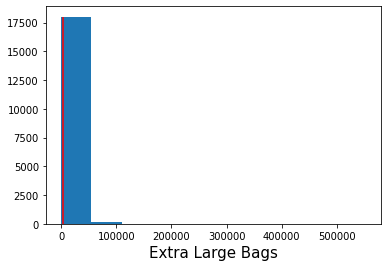

In [33]:
# Show the distribution of extra large bags sold using a histogram
plt.hist(avocados['xlarge_bags'])
plt.xlabel('Extra Large Bags', fontsize = 15)
plt.vlines(x = np.mean(avocados['xlarge_bags']),
                 ymin = 0,
                 ymax = 18000,
                 color = 'red');

**Year**

In [34]:
avocados['year'].describe()

# Mean is 2016
# Standard Deviatio is 0.94
# Min is 2015
# Max is 2018

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64

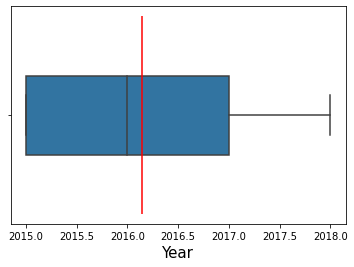

In [34]:
# Visualize the column 'year' using a boxplot

sns.boxplot(avocados['year'])
plt.xlabel('Year', fontsize = 15)
plt.vlines(x = np.mean(avocados['year']),
                 ymin = -1,
                 ymax = 1,
                 color = 'red');

###### 3.11: Feature Engineering

The three columns 'type', 'region' and 'date' are objects that can't have be incorporated into a model until we've quantified them.

**Plan**: Dummify 'type' and 'region', convert the 'date' column to 'month' and dummify that as well.

**Type**

In [37]:
# Get dummies for column 'type'
# In column type_organic, 0 = Conventional, 1 = Organic
type_dummies = pd.get_dummies(avocados[['type']], drop_first = True)


# Add new column to dataframe avocados, then drop column 'type'
avocados = pd.concat([avocados, type_dummies], axis = 1, join = 'outer')
avocados.drop(columns=['type'], inplace = True)

**Region**

In [38]:
# How many unique values are there for the column 'region' ?

avocados['region'].value_counts()

# There are 54 unique regions/cities

HartfordSpringfield    338
RaleighGreensboro      338
Spokane                338
Midsouth               338
Columbus               338
Detroit                338
Indianapolis           338
Philadelphia           338
LosAngeles             338
Chicago                338
SanFrancisco           338
Boise                  338
PhoenixTucson          338
LasVegas               338
DallasFtWorth          338
Boston                 338
Atlanta                338
Sacramento             338
Pittsburgh             338
Syracuse               338
StLouis                338
Louisville             338
GrandRapids            338
HarrisburgScranton     338
Northeast              338
Tampa                  338
SouthCentral           338
Orlando                338
Jacksonville           338
Roanoke                338
NorthernNewEngland     338
MiamiFtLauderdale      338
Portland               338
Southeast              338
Nashville              338
California             338
NewOrleansMobile       338
C

In [39]:
# Is the region 'TotalUS' important or not?
avocados[avocados['region'] == 'TotalUS']

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year,region,type_organic
2652,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,2015,TotalUS,0
2653,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,2015,TotalUS,0
2654,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,2015,TotalUS,0
2655,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,2015,TotalUS,0
2656,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,2015,TotalUS,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18220,2018-02-04,1.53,1384683.41,117922.52,287724.61,1703.52,977084.84,774695.74,201878.69,510.41,2018,TotalUS,1
18221,2018-01-28,1.61,1336979.09,118616.17,280080.34,1270.61,936859.49,796104.27,140652.84,102.38,2018,TotalUS,1
18222,2018-01-21,1.63,1283987.65,108705.28,259172.13,1490.02,914409.26,710654.40,203526.59,228.27,2018,TotalUS,1
18223,2018-01-14,1.59,1476651.08,145680.62,323669.83,1580.01,1005593.78,858772.69,146808.97,12.12,2018,TotalUS,1


In [40]:
# Is the region 'TotalUS' important or not?
avocados[avocados['region'] == 'TotalUS']['total_volume'].sort_values(ascending=False)

# So these are where the outliers are coming from...let's drop them

9097     62505646.52
8366     61034457.10
5506     52288697.89
8353     47293921.60
5493     46324529.70
            ...     
11792      515240.82
11781      514112.96
11784      511347.26
11782      507830.81
11791      501814.87
Name: total_volume, Length: 338, dtype: float64

In [41]:
# Based on 'region' = TotalUS criteria, set this dataframe equal to a variable to prep for dropping
total_us = avocados[avocados['region'] == 'TotalUS']

# Now drop it
avocados.drop(total_us.index, inplace=True)

In [42]:
# Now that we've dropped these rows, we can dummify the 'region' column
region_dummies = pd.get_dummies(avocados[['region']], drop_first = True)

# Add the dummy variables and drop the column 'region'
avocados = pd.concat([avocados, region_dummies], axis = 1, join = 'outer')
avocados.drop(columns=['region'], inplace = True)

**Date**

In [43]:
months = []

for i in avocados['date']:
    month = i[5:7]
    if month == '12':
        dec = 'dec'
        months.append(dec)
    elif month == '11':
        nov = 'nov'
        months.append(nov)
    elif month == '10':
        octo = 'octo'
        months.append(octo)
    elif month == '09':
        sept = 'sept'
        months.append(sept)
    elif month == '08':
        aug = 'aug'
        months.append(aug)
    elif month == '07':
        july = 'july'
        months.append(july)
    elif month == '06':
        june = 'june'
        months.append(june)
    elif month == '05':
        may = 'may'
        months.append(may)
    elif month == '04':
        april = 'april'
        months.append(april)
    elif month == '03':
        march = 'march'
        months.append(march)
    elif month == '02':
        feb = 'feb'
        months.append(feb)
    elif month == '01':
        jan = 'jan'
        months.append(jan)
    else:
        print(month)

In [44]:
# Check if above if statement worked
months[0:20]

['dec',
 'dec',
 'dec',
 'dec',
 'nov',
 'nov',
 'nov',
 'nov',
 'nov',
 'octo',
 'octo',
 'octo',
 'octo',
 'sept',
 'sept',
 'sept',
 'sept',
 'aug',
 'aug',
 'aug']

In [45]:
# Add list to dataframe 'avocados' as a new column
avocados['month'] = months
avocados['month']

0        dec
1        dec
2        dec
3        dec
4        nov
        ... 
18244    feb
18245    jan
18246    jan
18247    jan
18248    jan
Name: month, Length: 17911, dtype: object

In [46]:
# Dummify the months
month_dummies = pd.get_dummies(avocados[['month']], drop_first = True)

# Add the dummy variables and drop the columns 'month' and 'date'
avocados = pd.concat([avocados, month_dummies], axis = 1, join = 'outer')
avocados.drop(columns=['month', 'date'], inplace = True)







###### 3.12 : Check regression coeficients to see what best predictors of Average Sale Price might be

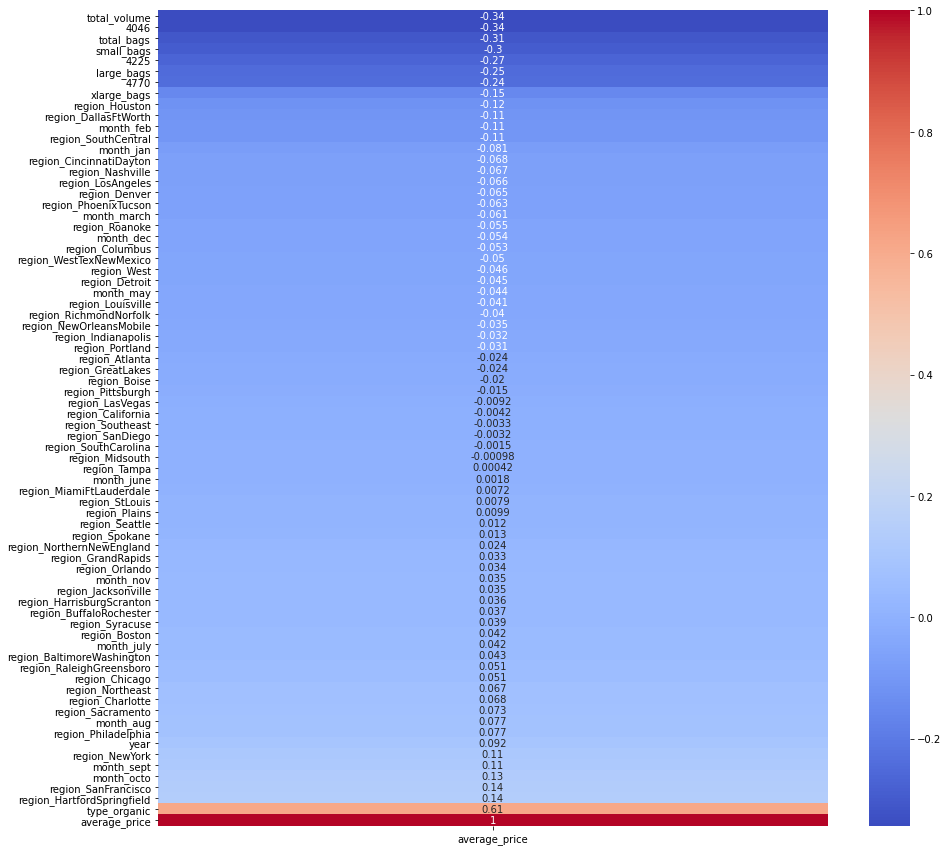

In [48]:
# To make it easier to view, let's do the same thing measuring each variable only against average sale price.

plt.figure(figsize = (15, 15))
sns.heatmap(avocados.corr()[['average_price']].sort_values('average_price'), cmap = 'coolwarm',
            annot = True);

**Export dataframe**

In [49]:
avocados.to_csv('cleaned_and_feature_engineered_avocados.csv')

### Step 4: Model the data

###### 4.01: Linear Regression

In [50]:
# Make necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [51]:
# Instantiate Linear Regression Model
lr = LinearRegression()

In [52]:
# Create X and y variables
X = avocados.drop(columns=['average_price'])
y = avocados['average_price']

In [53]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [55]:
# Cross-val score 
# This score of 0.62 isn't great
cross_val_score(lr, X_train, y_train, cv=5).mean()

0.6230743365075557

In [56]:
# Fit model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# Train score
lr.score(X_train, y_train)

0.6268408048934113

In [66]:
# Test score
# Doesn't deviate much from train score and cross val score
lr.score(X_test, y_test)

0.6274665681749202

In [58]:
# Make predictions
preds_lr = lr.predict(X_test)

In [59]:
# Calculate residuals
resids_lr = preds_lr - y_test

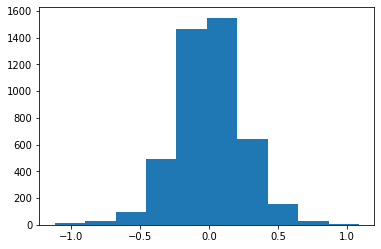

In [60]:
# Plot residuals 
plt.hist(resids_lr);

###### 4.02 Do the same linear regression fit with the log of y

In [64]:
# Instantiate Linear Regression Model
lr_log = LinearRegression()

In [62]:
# Create a set of y values that are the log of the y values

X_lr_log = avocados.drop(columns=['average_price'])
y_lr_log = np.log(avocados['average_price'])

In [63]:
# Train test split
X_train_lr_log, X_test_lr_log, y_train_lr_log, y_test_lr_log = train_test_split(X_lr_log,
                                                                                y_lr_log)

In [65]:
# Cross val score
# Barely better than it was previously
cross_val_score(lr, X_train_lr_log, y_train_lr_log, cv=5).mean()

0.6448808745851169

In [69]:
# Fit the model
lr_log.fit(X_train_lr_log, y_train_lr_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# Train score
lr_log.score(X_train_lr_log, y_train_lr_log)

0.6485821578019043

In [71]:
# Test score
# Still similar to train and cross val scores 
lr_log.score(X_test_lr_log, y_test_lr_log)

0.6306087354874945

In [72]:
# Make predictions
preds_lr_log = lr.predict(X_test_lr_log)

In [73]:
# Calculate residuals
resids_lr_log = preds_lr_log - y_test_lr_log

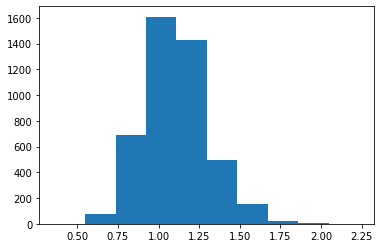

In [74]:
# Plot residuals 
plt.hist(resids_lr_log);

###### 4.03 Try fitting LASSO Regression

In [75]:
# Make necessary imports
from sklearn.linear_model import Lasso, LassoCV

In [76]:
# Set up alpha paramters to check
l_alphas = np.logspace(-3, 3, 100)

# Cross-validate over our range of alphas
lasso_cv = LassoCV(
        alphas = l_alphas,
        cv=5)

# Fit LASSO model using best alpha parameter
lasso_cv.fit(X_train, y_train)

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259.76265807857976, tolerance: 0.17676387954680828
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218.07508156965332, tolerance: 0.17676387954680828
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.51871813714808, tolerance: 0.17676387954680828
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.98680232794754, tolerance: 0.17439884425925928
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.93059988163145, tolerance: 0.17439884425925928
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.5578742046231, tolerance: 0.17439884425925928
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.75373352161512, tolerance: 0.17546395546249774
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.93109166175407, tolerance: 0.17546395546249774
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78.10531987094942, tolerance: 0.17546395546249774
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480.79049009877, tolerance: 0.17448049803107837
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.14316204204783, tolerance: 0.17448049803107837
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.0236838550852, tolerance: 0.17448049803107837
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436.16596175451366, tolerance: 0.17548631558388375
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 426.7434374039745, tolerance: 0.17548631558388375
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.6127856875258, tolerance: 0.17548631558388375
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklear

LassoCV(alphas=array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-0...
       2.15443469e+02, 2.47707636e+02, 2.84803587e+02, 3.27454916e+02,
       3.76493581e+02, 4.32876128e+02, 4.97702356e+02, 5.72236766e+02,
       6.57933225e+02, 7.56463328e+02, 8.69749003e+02, 1.00000000e+03]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [77]:
# Which alpha value was used?
lasso_cv.alpha_

0.001

In [78]:
# What do the coefficients look like?
lasso_cv.coef_

array([-3.51194328e-08, -1.48654966e-08,  3.39475528e-08, -6.99786166e-08,
       -1.43450359e-08,  9.17271836e-09, -8.67986474e-08,  2.40523268e-06,
        5.65868948e-02,  4.62678860e-01, -4.03519235e-02,  5.57811032e-02,
       -2.58979966e-02,  4.44743858e-02,  2.77061060e-02,  0.00000000e+00,
        1.37372212e-01,  8.45426927e-02, -1.63969894e-01, -1.20556387e-01,
       -2.74099513e-01, -1.39723933e-01, -9.79965569e-02,  1.87742832e-02,
       -1.33360483e-02,  2.45519068e-02,  3.25598552e-01, -3.00393215e-01,
       -7.25416398e-02,  2.63897506e-02, -0.00000000e+00, -1.38629281e-01,
       -9.00975554e-02,  0.00000000e+00,  0.00000000e+00, -1.68444631e-01,
       -7.36679392e-02,  2.47069198e-01,  1.46517416e-01,  5.90076706e-03,
        1.94761518e-02,  1.54037927e-01, -1.31207862e-01, -1.11979319e-02,
        0.00000000e+00, -3.83253492e-02,  7.01648362e-02, -9.25258206e-02,
       -1.41410016e-01,  1.52845733e-01, -0.00000000e+00,  3.37350088e-01,
        0.00000000e+00, -

In [80]:
# Cross val score
# Tons of convergence warnings on this one
# Score: 0.6057008980822872
cross_val_score(lasso_cv, X_train, y_train, cv=5).mean()

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.634635522699, tolerance: 0.14096675104118192
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.0982772577434, tolerance: 0.14096675104118192
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.72285828451493, tolerance: 0.14096675104118192
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.68567028512257, tolerance: 0.14204877903687335
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399.46850989351526, tolerance: 0.14204877903687335
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.3314592661822, tolerance: 0.14204877903687335
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklea

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375.3479934570518, tolerance: 0.14051860772595082
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367.777290330326, tolerance: 0.14051860772595082
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.88675577531035, tolerance: 0.14051860772595082
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.5416188763552, tolerance: 0.14223619269279986
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.2100219003234, tolerance: 0.14223619269279986
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.05060897389023, tolerance: 0.14223619269279986
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325.571031145776, tolerance: 0.14223619269279986
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.46158527130893, tolerance: 0.17676387954680814
  positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.9224672327514, tolerance: 0.13959714242438345
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coo

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322.118429672699, tolerance: 0.13959714242438345
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.6359182894322, tolerance: 0.1410550550331511
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186.47305987321016, tolerance: 0.1410550550331511
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219.97193769479725, tolerance: 0.13815655673141783
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.79483497655974, tolerance: 0.13815655673141783
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.41342908320757, tolerance: 0.13815655673141783
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.6599281193096, tolerance: 0.13890319762475287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.49307851250023, tolerance: 0.13890319762475287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.43128398107717, tolerance: 0.13890319762475287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.3393498804169, tolerance: 0.1398757057880656
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 412.127810015822, tolerance: 0.1398757057880656
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 409.9179295523421, tolerance: 0.1398757057880656
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/lin

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.99003008496925, tolerance: 0.1408762411887868
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166.44040212954098, tolerance: 0.1408762411887868
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.19242815867426, tolerance: 0.1408762411887868
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.1552082117529, tolerance: 0.1393986021146911
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.54060485810948, tolerance: 0.1393986021146911
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.58733219452915, tolerance: 0.1393986021146911
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.24070346506596, tolerance: 0.1399804782994067
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.76475618428594, tolerance: 0.1399804782994067
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.85709729155758, tolerance: 0.1399804782994067
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/li

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.10789161020432, tolerance: 0.14093510303594287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.9151251853367, tolerance: 0.14093510303594287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 283.14775362636027, tolerance: 0.14093510303594287
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188.78822318043427, tolerance: 0.13982300870303593
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.0054095033189, tolerance: 0.13982300870303593
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.66995678430453, tolerance: 0.13982300870303593
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklear

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 413.8963244886064, tolerance: 0.14034416900790878
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 411.03008787696047, tolerance: 0.14034416900790878
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407.178448634372, tolerance: 0.14034416900790878
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 229.6036548772206, tolerance: 0.1399547583903233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.91188877382575, tolerance: 0.1399547583903233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.87256976760375, tolerance: 0.1399547583903233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.50491404020886, tolerance: 0.17448049803107843
  positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.51663775863068, tolerance: 0.14068437965802022
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.14991341847042, tolerance: 0.14068437965802022
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.92204000187638, tolerance: 0.14082917827381627
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.424438792562, tolerance: 0.14082917827381627
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.7144411605941, tolerance: 0.14082917827381627
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.28552700944886, tolerance: 0.14134917660037233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.59517748408473, tolerance: 0.14134917660037233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.94647899159446, tolerance: 0.14134917660037233
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/skle

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.00685926962774, tolerance: 0.1390533212107467
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 400.1914579673942, tolerance: 0.1390533212107467
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 398.8635408181378, tolerance: 0.1390533212107467
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/l

/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330.32957227591055, tolerance: 0.1400287015689694
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 323.1786626253787, tolerance: 0.1400287015689694
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.42344314494864, tolerance: 0.1400287015689694
  tol, rng, random, positive)
/Users/michaellaccavole/opt/anaconda3/lib/python3.7/site-packages/sklearn/

0.6057008980822872

In [81]:
# Train score
lasso_cv.score(X_train, y_train)

0.608799202568381

In [82]:
# Test score
# Better than both train and cross val scores?!
lasso_cv.score(X_test, y_test)

0.611252338782075

In [83]:
# Make predictions
preds_lasso = lasso_cv.predict(X_test)

In [84]:
# Calculate residuals
resids_lasso = preds_lasso - y_test

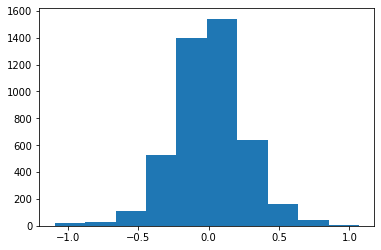

In [85]:
# Plot residuals
plt.hist(resids_lasso);

###### 4.04 K Nearest Neighbor Regressor

In [87]:
# Make necessary imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [95]:
# Create a pipeline with instantiated scaler and transformer
knn_reg_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Set up pipeline parameters
knn_reg_params = {
    'ss__with_mean' : [True, False],
    'ss__with_std' : [True, False],
    'knn__n_neighbors' : [3, 4, 5, 6],
    'knn__weights' : ['uniform', 'distance']

}

#gs_knn = GridSearchCV(knn_reg_pipe, knn_reg_params, cv=5)

# Fit data
#gs_knn.fit(X_train, y_train)

# Print off train score, test score, cross-val score
print(f'Train score is {gs_knn.score(X_train, y_train)}')
print(f'Test score is {gs_knn.score(X_test, y_test)}')
print(f'Best parameters for this KNN model are {gs_knn.best_params_}')

Train score is 1.0
Test score is 0.871143856864739
Best parameters for this KNN model are {'knn__n_neighbors': 5, 'knn__weights': 'distance', 'ss__with_mean': True, 'ss__with_std': True}


###### 4.05 Random Forest Regressor

In [92]:
# Make necessary imports
from sklearn.ensemble import RandomForestRegressor

In [93]:
# Instantiate Random Forest Regressor
rf = RandomForestRegressor()

# Create a parameters for GridSearch
rf_params = {
    'n_estimators' : [50, 100],
    'max_features' : [None, 'auto'],
    'max_depth' : [None, 3, 4, 5]
}

# GridSearch for best-performing model
gs_rf = GridSearchCV(rf, rf_params, cv=5)

# Fit the best model to the X_train and X_test
gs_rf.fit(X_train, y_train)

# Print off best score, test score, and best params
print(f'Best score is {gs_rf.best_score_}')
print(f'Best parameters are {gs_rf.best_params_}')
print(f'Test score is {gs_rf.score(X_test, y_test)}')

Best score is 0.8761413518294552
Best parameters are {'max_depth': None, 'max_features': None, 'n_estimators': 100}
Test score is 0.8937983373256568


### Step 5: Conclusions

1. Being organic is the strongest positive indicator of price
2. Total volume is the strongest negative indicator of sales
3. Most expensive avocado markets are Hartford/Springfield, San Francisco, and New York
4. Avocado prices seem to peak in October after climbing during the summer and early fall
5. Linear Regression had the best bias-variance tradeoff of all the models
6. Accounting for big differences in the value types of X had little impact on the outcomes (from taking log of y)
7. LASSO Regression had little impact on the model's performance
8. KNN model is extremely overfit, but has a higher test score than the Linear Regression model
9. Random Forest Regressor seems to have the best performance, with a large improvement from the multiple linear regression and LASSO models while not being overfit like the KNN model
10. Given more time, I think removing variables and doing more feature engineering would improve the accuracy of the model